In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
import lux

In [2]:
mydata = pd.read_excel('Win_Prediction_Data.Xlsx')

In [3]:
mydata

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
newdata = mydata.copy()
newdata.head(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

# Preprocessing

In [5]:
newdata.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
newdata.isnull().sum()/len(newdata)*100

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<function matplotlib.pyplot.show(close=None, block=None)>

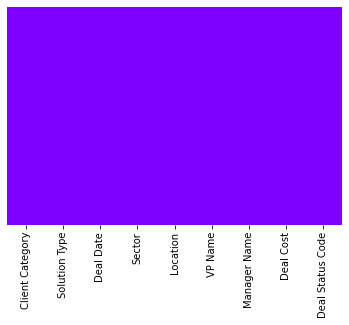

In [7]:
sns.heatmap(newdata.isnull(), yticklabels = False, cbar = False, cmap = 'rainbow')
plt.show

In [8]:
newdata.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [9]:
#handling missing values
newdata['Client Category'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
newdata['Client Category'] = newdata['Client Category'].fillna('Others')

In [11]:
newdata.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [12]:
#Describe the object data type
newdata.describe(include = 'O')


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
newdata['Deal Status Code'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
Client_Category = newdata['Client Category'].value_counts()
Client_Category

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
Client_Category_index = newdata['Client Category'].value_counts().index
Client_Category_index

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'Holding', 'International Org', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object')

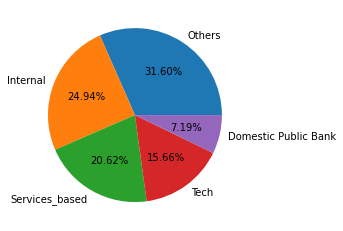

In [16]:
plt.pie(Client_Category[:5], labels = Client_Category_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

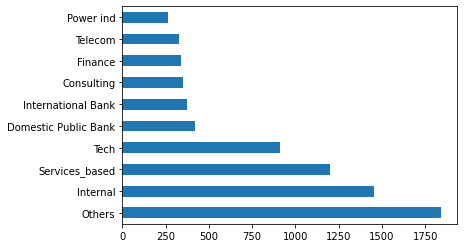

In [17]:
Client_Category[:10].plot(kind='barh')

In [18]:
VP_Name = newdata['VP Name'].value_counts()
VP_Name

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [19]:
VP_Name_index = newdata['VP Name'].value_counts().index
VP_Name_index

Index(['Mervin Harwood', 'Ankita Aggarwal', 'Sargar Deep Rao',
       'Long Bergstrom', 'Mangesh K. Singh', 'Rosanna Maynez', 'Ekta Zutshi',
       'Rahul Bajpai', 'neeraj kumar', 'Son Mcconnaughy', 'som dutt',
       'Hardeep Suksma', 'Brendon Wycoff', 'Clinton Mani', 'Saurabh Singh',
       'Jewell Tunstall', 'Rudraksh Sharma', 'Gopa Trilochana',
       'Russell Dahlen', 'Molly Eakes', 'Alam Syed', 'Gaurav Sameria',
       'Gayle Molter', 'Varsha Arora', 'Vidur Hukle', 'Earline Langton',
       'Manpreet Singh', 'Mayank Mewar', 'Marcella Mo', 'Rahul Kocher',
       'Man Suddeth', 'Jitendra Choudhary', 'Prashant Rawat', 'Lilli Storrs',
       'Vikram Rawat', 'Kamelesh Srinivasan', 'Dennis Faux', 'Waylon Mulder',
       'Visvajeet Das', 'Sarthak Batra', 'md. afsar', 'P. Somya',
       'Kirk Hofmeister'],
      dtype='object')

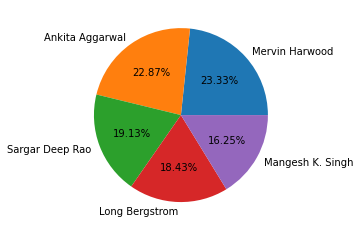

In [20]:
plt.pie(VP_Name[:5], labels = VP_Name_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

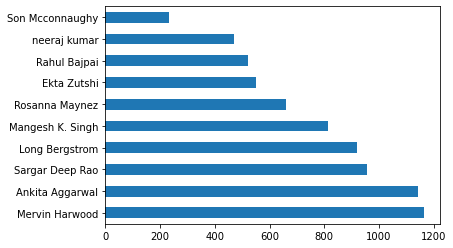

In [21]:
VP_Name[:10].plot(kind = 'barh')

In [22]:
Manager_Name = newdata['Manager Name'].value_counts()
Manager_Name

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [23]:
Manager_Name_index = newdata['Manager Name'].value_counts().index
Manager_Name_index

Index(['Molly Eakes', 'Rudraksh Sharma', 'Desmond Krout', 'Gayle Molter',
       'Manpreet Singh', 'Rosana Yokum', 'Rayford Durgan', 'Manish Saundriyal',
       'Jewell Tunstall', 'Hardeep Suksma',
       ...
       'Sultan Khan', 'Heath Mullarkey', 'Natalia Dumlao', 'Anju Nanda',
       'Uzaar Ali', 'Sumit Arora', 'Ali Rafiq', 'Arti Bindra', 'Ike Deppen',
       'Lokesh Pinani'],
      dtype='object', length=278)

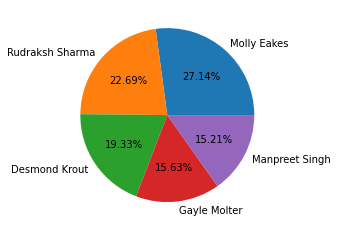

In [24]:
plt.pie(Manager_Name[:5], labels = Manager_Name_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

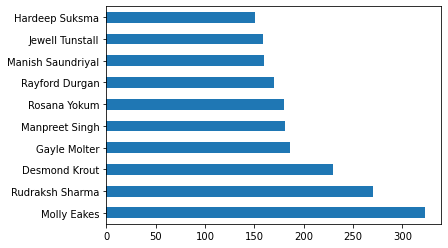

In [25]:
Manager_Name[:10].plot(kind = 'barh')

In [26]:
newdata.head(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [27]:
newdata.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

In [28]:
rel_client_cat = newdata[['Client Category',
                          'Deal Status Code']].groupby(['Client Category', 
                                                        'Deal Status Code']).size().reset_index().rename(columns = {0: 'Total count'})
rel_client_cat

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [29]:
Solution_Type_cat = newdata[['Solution Type',
                          'Deal Status Code']].groupby(['Solution Type', 
                                                        'Deal Status Code']).size().reset_index().rename(columns = {0: 'Total count'})
Solution_Type_cat

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [30]:
VP_Name_cat = newdata[['VP Name',
                          'Deal Status Code']].groupby(['VP Name', 
                                                        'Deal Status Code']).size().reset_index().rename(columns = {0: 'Total count'})
VP_Name_cat

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [31]:
Manager_Name_cat = newdata[['Manager Name',
                          'Deal Status Code']].groupby(['Manager Name', 
                                                        'Deal Status Code']).size().reset_index().rename(columns = {0: 'Total count'})
Manager_Name_cat

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [32]:
print(pd.pivot_table(newdata, index = 'Deal Status Code', columns = 'Manager Name', values = 'Deal Cost'))

Manager Name      Aastha Gandhi  Abhinav Warrier  Abhishek Singhal  \
Deal Status Code                                                     
Lost                        NaN    588808.824000     772860.963182   
Won                   242647.06    302235.296667     476956.522609   

Manager Name      Abhiskek Kumar   Abhiskhek  D    Abram Fines  Aditya Kumar  \
Deal Status Code                                                               
Lost               949894.957857  440767.973889  501764.706000     792647.06   
Won                587507.740789  375658.823600  714127.789655     250367.65   

Manager Name      Aditya Tondon   Ahdarsha Jha  Ahswini Saini  ...  \
Deal Status Code                                               ...   
Lost                 1058823.53  924866.311818     1029411.77  ...   
Won                         NaN  351102.940000      601470.59  ...   

Manager Name          shafibul  sharat chandran   sheak shakir  shiv kumar  \
Deal Status Code                       

In [33]:
print(pd.pivot_table(newdata, index = 'Deal Status Code', columns = 'VP Name', values = 'Deal Cost'))

VP Name              Alam Syed  Ankita Aggarwal  Brendon Wycoff  \
Deal Status Code                                                  
Lost              1.087144e+06     654206.63000    1.096894e+06   
Won               1.172937e+06     503528.35065    1.909288e+06   

VP Name            Clinton Mani    Dennis Faux  Earline Langton   Ekta Zutshi  \
Deal Status Code                                                                
Lost              776755.218548  554656.861667     1.189219e+06  7.912821e+05   
Won               600857.843500  315294.120000     6.034314e+05  1.021396e+06   

VP Name           Gaurav Sameria  Gayle Molter  Gopa Trilochana  ...  \
Deal Status Code                                                 ...   
Lost               554590.017879  7.291971e+05     1.464321e+06  ...   
Won                586433.823958  1.282863e+06     8.195701e+05  ...   

VP Name           Saurabh Singh  Son Mcconnaughy  Varsha Arora    Vidur Hukle  \
Deal Status Code                    

In [34]:
import datetime 
newdata['Deal year'] = newdata['Deal Date'].dt.year

In [35]:
newdata.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

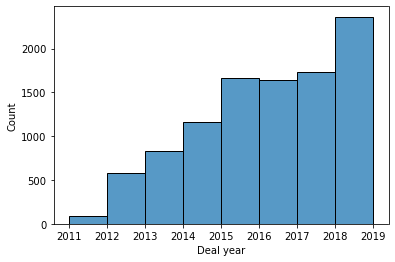

In [36]:
sns.histplot(newdata['Deal year'], bins = 8)
plt.show()

In [37]:
newdata['Deal_Month'] = newdata['Deal Date'].dt.month

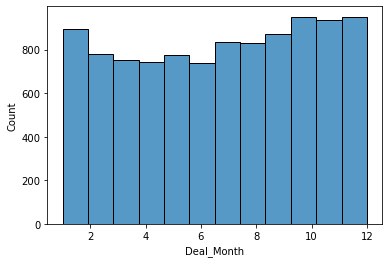

In [38]:
sns.histplot(newdata['Deal_Month'], bins = 12)
plt.show()

In [39]:
newdata['Deal_Date_quarter'] = newdata['Deal Date'].dt.quarter

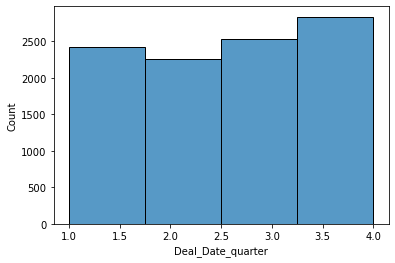

In [40]:
sns.histplot(newdata['Deal_Date_quarter'], bins = 4)
plt.show()

<AxesSubplot:>

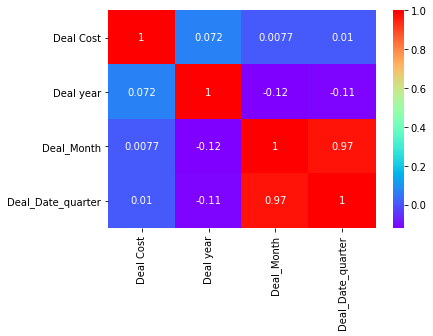

In [41]:
sns.heatmap(newdata.corr(), annot = True, cmap='rainbow')

In [42]:
newdata.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code', 'Deal year',
       'Deal_Month', 'Deal_Date_quarter'],
      dtype='object')

In [45]:
#split the data into trainig and test for Top 5 VP and Manager combination before doing feature encoding and feature sacling as
# the original names will be lost after doing that.

X = newdata.drop(['Deal Status Code'], axis=1)
Y = newdata['Deal Status Code']
from sklearn.model_selection import train_test_split
x_train_unscaled, x_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X, Y, train_size = 0.70, random_state = 101)

In [46]:
#Feature encoding

newdata['Client Category'] = newdata['Client Category'].astype('category')
newdata['Client Category'] = newdata['Client Category'].cat.codes

newdata['Solution Type'] = newdata['Solution Type'].astype('category')
newdata['Solution Type'] = newdata['Solution Type'].cat.codes

newdata['VP Name'] = newdata['VP Name'].astype('category')
newdata['VP Name'] = newdata['VP Name'].cat.codes

newdata['Manager Name'] = newdata['Manager Name'].astype('category')
newdata['Manager Name'] = newdata['Manager Name'].cat.codes

newdata['Deal Status Code'] = newdata['Deal Status Code'].astype('category')
newdata['Deal Status Code'] = newdata['Deal Status Code'].cat.codes

In [47]:
newdata

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [48]:
newdata.drop(['Deal year', 'Deal_Month', 'Deal_Date_quarter', 'Sector', 'Location', 'Deal Date'], axis=1, inplace =True)

In [49]:
newdata

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [50]:
# Train - Test Split

X = newdata.drop(['Deal Status Code'], axis=1)
Y = newdata['Deal Status Code']

In [51]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [52]:
#split the data into trainig and text
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, train_size = 0.70, random_state = 101)

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=20)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [55]:
# Confusion Matrix

print('confusion_matrix_train :', confusion_matrix(y_train, y_pred_rfc_train))
print('-------------------------------')
print('confusion_matrix_test :' , confusion_matrix(y_test, y_pred_rfc_test))

confusion_matrix_train : [[4341   10]
 [  57 2634]]
-------------------------------
confusion_matrix_test : [[1795  160]
 [ 436  628]]


In [56]:
# Accuracy Score

print('accuracy_score_train: ', accuracy_score(y_train, y_pred_rfc_train))
print('-------------------------------')
print('accuracy_score_test: ',accuracy_score(y_test,y_pred_rfc_test))

accuracy_score_train:  0.9904856574836695
-------------------------------
accuracy_score_test:  0.8025836369658828


In [57]:
#Classsification report

print('classification_report_train: ', classification_report(y_train, y_pred_rfc_train))
print('-------------------------------')
print('classification_report_test: ', classification_report(y_test, y_pred_rfc_test))

classification_report_train:                precision    recall  f1-score   support

           0       0.99      1.00      0.99      4351
           1       1.00      0.98      0.99      2691

    accuracy                           0.99      7042
   macro avg       0.99      0.99      0.99      7042
weighted avg       0.99      0.99      0.99      7042

-------------------------------
classification_report_test:                precision    recall  f1-score   support

           0       0.80      0.92      0.86      1955
           1       0.80      0.59      0.68      1064

    accuracy                           0.80      3019
   macro avg       0.80      0.75      0.77      3019
weighted avg       0.80      0.80      0.79      3019



# Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [59]:
y_pred_gnb_train = gnb.predict(x_train)
y_pred_gnb_test = gnb.predict(x_test)

In [60]:
# Confusion Matrix

print('confusion_matrix_train :', confusion_matrix(y_train, y_pred_gnb_train))
print('-------------------------------')
print('confusion_matrix_test :' , confusion_matrix(y_test, y_pred_gnb_test))

confusion_matrix_train : [[4273   78]
 [2616   75]]
-------------------------------
confusion_matrix_test : [[1929   26]
 [1032   32]]


In [61]:
# Accuracy Score

print('accuracy_score_train: ', accuracy_score(y_train, y_pred_gnb_train))
print('-------------------------------')
print('accuracy_score_test: ',accuracy_score(y_test,y_pred_gnb_test))

accuracy_score_train:  0.6174382277761999
-------------------------------
accuracy_score_test:  0.6495528320635973


In [62]:
#Classsification report

print('classification_report_train: ', classification_report(y_train, y_pred_gnb_train))
print('-------------------------------')
print('classification_report_test: ', classification_report(y_test, y_pred_gnb_test))

classification_report_train:                precision    recall  f1-score   support

           0       0.62      0.98      0.76      4351
           1       0.49      0.03      0.05      2691

    accuracy                           0.62      7042
   macro avg       0.56      0.50      0.41      7042
weighted avg       0.57      0.62      0.49      7042

-------------------------------
classification_report_test:                precision    recall  f1-score   support

           0       0.65      0.99      0.78      1955
           1       0.55      0.03      0.06      1064

    accuracy                           0.65      3019
   macro avg       0.60      0.51      0.42      3019
weighted avg       0.62      0.65      0.53      3019



# KNN 

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [64]:
y_pred_knn_train = gnb.predict(x_train)
y_pred_knn_test = gnb.predict(x_test)

In [65]:
# Confusion Matrix

print('confusion_matrix_train :', confusion_matrix(y_train, y_pred_knn_train))
print('-------------------------------')
print('confusion_matrix_test :' , confusion_matrix(y_test, y_pred_knn_test))

confusion_matrix_train : [[4273   78]
 [2616   75]]
-------------------------------
confusion_matrix_test : [[1929   26]
 [1032   32]]


In [66]:
# Accuracy Score

print('accuracy_score_train: ', accuracy_score(y_train, y_pred_knn_train))
print('-------------------------------')
print('accuracy_score_test: ',accuracy_score(y_test,y_pred_knn_test))

accuracy_score_train:  0.6174382277761999
-------------------------------
accuracy_score_test:  0.6495528320635973



## Since RandomForestClassifer is giving us the Best results, we will go with it to find the Top- 5 Head-Bid Manager Combination to optimize the win rate, helping the company prioritize efforts and allocate resources effectively to meet growth targets.

In [67]:
y_pred_proba = rfc.predict_proba(x_test)[:, 1]

In [68]:
y_pred_proba

array([0.5838801 , 0.508     , 0.22      , ..., 0.24505703, 0.18393226,
       0.23893669])

In [75]:
X_test_df = pd.DataFrame(x_test_unscaled, columns=newdata.drop(['Deal Status Code'], axis=1).columns)
X_test_df['Win Probability'] = y_pred_proba
X_test_df['Actual Outcome'] = y_test.values

top_combinations = X_test_df.groupby(['VP Name', 'Manager Name'])['Win Probability'].mean().reset_index()
top_5_combinations = top_combinations.sort_values(by='Win Probability', ascending=False).head(5)

print('Top-5 Head-Bid Manager combinations:', '\n', top_5_combinations)

Top-5 Head-Bid Manager combinations: 
             VP Name      Manager Name  Win Probability
119     Ekta Zutshi  Leeladhar Pandey         0.960000
417    Rahul Bajpai    Royal Garofalo         0.926769
246  Long Bergstrom      Naveen Dogra         0.924889
659        som dutt     Roop Sachdeva         0.907500
4         Alam Syed    Genny Mcgivney         0.900000
